### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

### Data

In [122]:
df = pd.read_csv('datasets/train_only_cleaned.csv')

final_features = df[['gr_liv_area', 'age', 'overall_qual', 'gr_liv_area/totrms_abvgrd',
                 'since_remod/add', 'garage_area', 'kitchen_qual_order', 'total_bsmt_sf', 'before_1940', 'over_10', 'bsmtfin_sf_1', 'neighborhood', 'fireplaces']]
final_features = pd.get_dummies(final_features, columns=['neighborhood'], drop_first=True);


### Model

In [123]:
X = final_features
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [124]:
# pipe lines
pipe_lr = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lr', LinearRegression())
])

pipe_lcv = Pipeline([
     ('pf', PolynomialFeatures(include_bias=False)),
     ('ss', StandardScaler()),
     ('lcv', LassoCV())
])

In [125]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('lr', LinearRegression())])

In [126]:
params = {
    'lr__penalty': ['l1', 'l2']
}

In [127]:
pipe_lr.score(X_train, y_train), pipe_lr.score(X_test, y_test)

(0.9504345821638687, -1.0862425625391286e+19)

In [128]:
y_preds = pipe_lr.predict(X_test)
resids = y_test-y_preds        

In [129]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lr, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 12769918076371.062
RMSE = 262839791411660.97
CVS = -1.2673686073154126e+22


In [130]:
pipe_lcv.fit(X_train, y_train);

C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1756150539.3260498, tolerance: 960340167.395799
  model = cd_fast.enet_coordinate_descent(


In [131]:
pipe_lcv.score(X_train, y_train) , pipe_lcv.score(X_test, y_test)

(0.9323153184789452, 0.9252768903053928)

In [81]:
y_preds = pipe_lcv.predict(X_test)
resids = y_test-y_preds   
resids.mean()

-637.807719727045

In [40]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(pipe_lcv, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

MAE = 15433.072063415659
RMSE = 21799.93378987413


C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 657900454.5826416, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797145814.7772827, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866980790.8986206, tolerance: 623801655.5667152
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\mmoli\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

CVS = 0.8998104664289606


---

In [47]:
coef_df = pd.DataFrame({
    'coef': pf.get_feature_names(X.columns),
    'lasso coefs': lcv.coef_,
})

coef_df.sort_values(by= 'lasso coefs', ascending= False).head(15)

,coef,lasso coefs
121,overall_qual total_bsmt_sf,20621.795222
41,gr_liv_area overall_qual,19117.145974
10,bsmtfin_sf_1,16269.328684
69,gr_liv_area neighborhood_NridgHt,16088.511131
45,gr_liv_area kitchen_qual_order,12357.097107
259,kitchen_qual_order total_bsmt_sf,12252.381043
322,total_bsmt_sf neighborhood_Veenker,8777.735277
314,total_bsmt_sf neighborhood_NridgHt,8763.398542
225,garage_area kitchen_qual_order,6722.270860
168,gr_liv_area/totrms_abvgrd neighborhood_Edwards,6537.066273


In [50]:
plt.plot(pipe_lcv.alpha_, pipe_lcv.coef_)

AttributeError: 'Pipeline' object has no attribute 'alpha_'

In [132]:
coef_df = pd.DataFrame({
    'coef': pf.get_feature_names(X.columns),
    'lasso coefs': lcv.coef_,
})
coef_df.sort_values(by= 'lasso coefs').head(5)

,coef,lasso coefs
291,total_bsmt_sf^2,-18642.429168
49,gr_liv_area bsmtfin_sf_1,-10256.702616
215,since_remod/add neighborhood_NridgHt,-10112.126134
302,total_bsmt_sf neighborhood_Edwards,-9392.165041
6,kitchen_qual_order,-7770.371870


In [133]:
coef_df.sort_values(by= 'lasso coefs', ascending=False).head(5)

,coef,lasso coefs
121,overall_qual total_bsmt_sf,20621.795222
41,gr_liv_area overall_qual,19117.145974
10,bsmtfin_sf_1,16269.328684
69,gr_liv_area neighborhood_NridgHt,16088.511131
45,gr_liv_area kitchen_qual_order,12357.097107


In [84]:
model.alpha_

173.58537527186186

,gr_liv_area,age,overall_qual,gr_liv_area/totrms_abvgrd,since_remod/add,garage_area,kitchen_qual_order,total_bsmt_sf,before_1940,over_10,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
gr_liv_area,1.000000,-0.259183,0.566727,0.644838,-0.321619,0.490692,0.443938,0.453846,-0.067819,-0.253665,...,0.296354,0.223953,-0.036839,0.012258,-0.161054,0.053961,0.043339,0.132492,0.049791,0.054586
age,-0.259183,1.000000,-0.602635,-0.291089,0.629989,-0.486986,-0.538064,-0.410185,0.747533,0.672034,...,-0.121878,-0.280711,0.475610,0.168855,0.069893,-0.136600,-0.284852,-0.123499,-0.125408,-0.035380
overall_qual,0.566727,-0.602635,1.000000,0.502222,-0.584594,0.563578,0.691017,0.548681,-0.250484,-0.584754,...,0.191345,0.382104,-0.180321,-0.045939,-0.174861,0.040928,0.240451,0.225015,0.118919,0.079507
gr_liv_area/totrms_abvgrd,0.644838,-0.291089,0.502222,1.000000,-0.312751,0.393584,0.401929,0.379951,-0.116981,-0.229039,...,0.202417,0.136888,-0.062004,0.007892,-0.163423,0.055561,0.149725,0.144522,0.035844,0.119198
since_remod/add,-0.321619,0.629989,-0.584594,-0.312751,1.000000,-0.398623,-0.617431,-0.308749,0.278631,0.610380,...,-0.091070,-0.258931,0.155997,0.103413,0.080720,-0.104947,-0.258349,-0.097625,-0.095827,-0.018324
garage_area,0.490692,-0.486986,0.563578,0.393584,-0.398623,1.000000,0.485867,0.488805,-0.292447,-0.394969,...,0.177141,0.325076,-0.141242,-0.120122,-0.068809,0.028805,0.170890,0.099444,0.082758,0.045282
kitchen_qual_order,0.443938,-0.538064,0.691017,0.401929,-0.617431,0.485867,1.000000,0.438450,-0.231343,-0.593766,...,0.126867,0.371505,-0.122823,-0.103818,-0.134190,0.079981,0.212823,0.181219,0.107474,0.058249
total_bsmt_sf,0.453846,-0.410185,0.548681,0.379951,-0.308749,0.488805,0.438450,1.000000,-0.263279,-0.348805,...,0.120102,0.322230,-0.170011,-0.058165,-0.066360,-0.021853,0.069198,0.145665,0.103336,0.081493
before_1940,-0.067819,0.747533,-0.250484,-0.116981,0.278631,-0.292447,-0.231343,-0.263279,1.000000,0.268386,...,-0.067615,-0.109846,0.481576,0.213377,-0.075080,-0.078728,-0.113627,-0.060011,-0.067615,-0.039931
over_10,-0.253665,0.672034,-0.584754,-0.229039,0.610380,-0.394969,-0.593766,-0.348805,0.268386,1.000000,...,0.059055,-0.409286,0.172647,0.068612,0.147129,-0.038722,-0.365033,-0.101979,-0.128984,0.056231


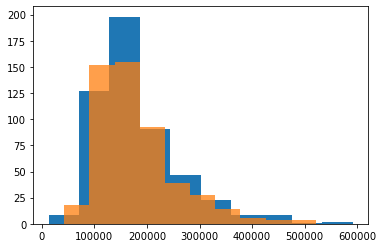

In [92]:
plt.hist(y_test)
plt.hist(y_preds, alpha=.75);

In [42]:
y.shape

(2049,)

In [43]:
y_preds.shape

(513,)

Text(0.5, 0, 'Predicted housing price in dollars($)')

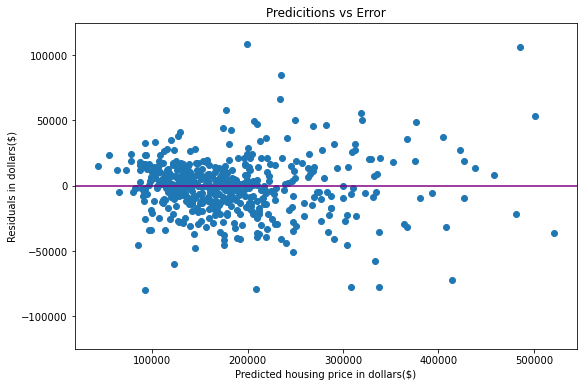

In [97]:
plt.figure(figsize=(9,6))
plt.scatter(y_preds, resids)
plt.axhline(0, color='purple')
plt.ylim(-125000, 125000)
plt.title("Predictions vs Error")
plt.ylabel('Residuals in dollars($)')
plt.xlabel('Predicted housing price in dollars($)')

Text(0.5, 0, 'Predicted pricing in dollars($)')

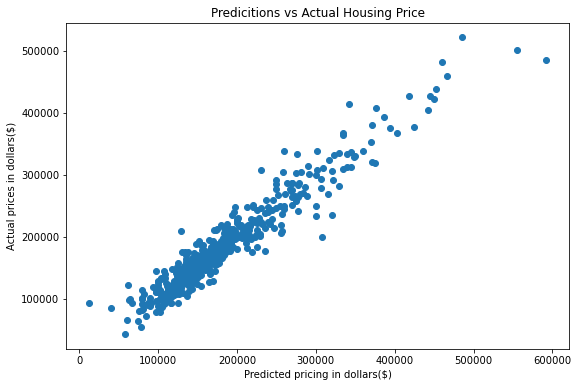

In [90]:
plt.figure(figsize=(9,6))
plt.scatter(y_test, y_preds)
plt.title("Predicitions vs Actual Housing Price")
plt.ylabel('Actual prices in dollars($)')
plt.xlabel('Predicted pricing in dollars($)')

In [54]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    pipe_lcv.alphas_ ,
    pipe_lcv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_ + EPSILON, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

AttributeError: 'DataFrame' object has no attribute 'alphas_'

Text(0.5, 0, 'Range of errors in dollars ($)')

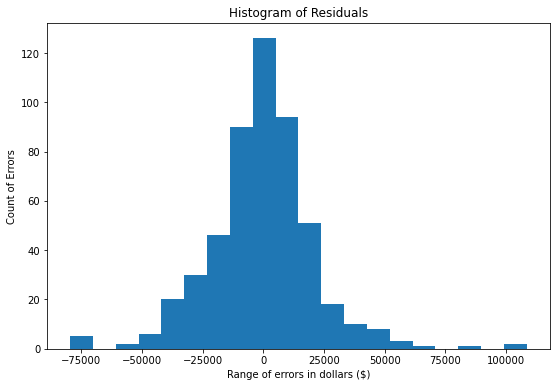

In [105]:
plt.figure(figsize=(9,6))
plt.hist(resids, bins=20);
plt.title('Histogram of Residuals')
plt.ylabel('Count of Errors')
plt.xlabel('Range of errors in dollars ($)')

In [66]:
import statsmodels.api as sm

X = final_features
X = sm.add_constant(X)
y = df['saleprice']
ols = sm.OLS(y, X).fit()

ols.summary()

C:\Users\mmoli\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     283.6
Date:                Thu, 23 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:40:32   Log-Likelihood:                -24102.
No. Observations:                2049   AIC:                         4.828e+04
Df Residuals:                    2009   BIC:                         4.851e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.404e+04   9846.811     -3.457      0.001   -5.33e+04   -1.47e+04
gr_liv_area                  42.0263      2.234     18.809      0.000      37.644      46.408
age                         -65.2442     77.785     -0.839      0.402    -217.792      87.304
overall_qual               1.267e+04    935.994     13.537      0.000    1.08e+04    1.45e+04
gr_liv_area/totrms_abvgrd   -33.2152     21.642     -1.535      0.125     -75.659       9.228
since_remod/add            -190.2877     50.913     -3.738      0.000    -290.135     -90.440
garage_area                  38.0096      4.457      8.529      0.000      29.270      46.750
kitchen_qual_order         1.408e+04   1651.524      8.526      0.000    1.08e+04    1.73e+04
total_bsmt_sf                12.0896      2.267      5.333      0.000       7.644      16.535
before_1940               -3909.4483   4094.828     -0.955      0.340   -1.19e+04    4121.105
over_10                   -6108.5499   2995.358     -2.039      0.042    -1.2e+04    -234.218
bsmtfin_sf_1                 17.8026      1.922      9.262      0.000      14.033      21.572
fireplaces                 9121.5471   1371.724      6.650      0.000    6431.397    1.18e+04
neighborhood_Blueste      -1.022e+04   1.47e+04     -0.695      0.487   -3.91e+04    1.86e+04
neighborhood_BrDale       -9682.6604   1.03e+04     -0.938      0.348   -2.99e+04    1.06e+04
neighborhood_BrkSide       1.213e+04   8531.664      1.422      0.155   -4601.198    2.89e+04
neighborhood_ClearCr       3.082e+04   9490.366      3.248      0.001    1.22e+04    4.94e+04
neighborhood_CollgCr       1.364e+04   7240.632      1.884      0.060    -557.591    2.78e+04
neighborhood_Crawfor       3.078e+04   8296.366      3.710      0.000    1.45e+04     4.7e+04
neighborhood_Edwards       2023.5068   7813.319      0.259      0.796   -1.33e+04    1.73e+04
neighborhood_Gilbert       1.129e+04   7459.273      1.514      0.130   -3335.948    2.59e+04
neighborhood_Greens       -5378.6868   1.97e+04     -0.274      0.784   -4.39e+04    3.32e+04
neighborhood_GrnHill       1.095e+05   2.34e+04      4.679      0.000    6.36e+04    1.55e+05
neighborhood_IDOTRR        4789.5848   8757.111      0.547      0.584   -1.24e+04     2.2e+04
neighborhood_Landmrk      -1626.6801   3.23e+04     -0.050      0.960   -6.49e+04    6.16e+04
neighborhood_MeadowV      -1782.5054   9771.361     -0.182      0.855   -2.09e+04    1.74e+04
neighborhood_Mitchel       1.286e+04   7956.712      1.616      0.106   -2748.042    2.85e+04
neighborhood_NAmes         9848.7695   7623.075      1.292      0.197   -5101.190    2.48e+04
neighborhood_NPkVill      -5341.6281   1.05e+04     -0.509      0.611   -2.59e+04    1.52e+04
neighborhood_NWAmes        8701.4350   7975.851      1.091      0.275   -69

#### The final model I chose was the pipe_lcv model:
* r2_train of .93, 
* r2_test of .92, 
* cvs of .89, 
* residual mean of -637.807719727045, 
* mae of 15433 
* rmse of 21799

##### This model, all things held constant, explains .92 of the variation of price given the indepedent variables. Because the train r2 is larger than the test r2, the model is slightly overfit i.e has higher variance however because the scores are within .01 the model is acceptable. 